In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [2]:
data = pd.read_json("../results/measure_positional_bias_vs_k/rankings.jsonl", lines=True)
data['temp'] = data.ranking_order.map(lambda r: [dict(position=pos, rank=rank + 1) for rank, pos in enumerate(r)])
data

,prompt,answers,rating_text,ranking_order,model_ranking,k,temp
0,\n\nHuman: Is Alkaline water better for you?\n...,"[{'answer': 'Hm, that’s a hard question. It p...",This is a good natured conversation.\n\nPairwi...,"[6, 1, 4, 5, 3, 0, 2]","[gpt-4-0613, mistral-7b-instruct-v0.1, gpt-3.5...",7,"[{'position': 6, 'rank': 1}, {'position': 1, '..."
1,\n\nHuman: Is Alkaline water better for you?\n...,"[{'answer': 'Alkaline water, also known as ion...",This is a good natured conversation.\n\nPairwi...,"[3, 0, 2, 4, 5, 1]","[gpt-4-0613, mistral-7b-instruct-v0.1, gpt-3.5...",6,"[{'position': 3, 'rank': 1}, {'position': 0, '..."
2,\n\nHuman: Is Alkaline water better for you?\n...,[{'answer': 'Alkaline water has a higher pH le...,This is a good natured conversation. The human...,"[4, 1, 0, 2, 3]","[gpt-3.5-turbo, mistral-7b-instruct-v0.1, gpt-...",5,"[{'position': 4, 'rank': 1}, {'position': 1, '..."
3,\n\nHuman: Is Alkaline water better for you?\n...,[{'answer': 'Alkaline water has a higher pH le...,This is a good natured conversation.\n\nPairwi...,"[3, 0, 1, 2]","[mistral-7b-instruct-v0.1, gpt-4, gpt-3.5-turb...",4,"[{'position': 3, 'rank': 1}, {'position': 0, '..."
4,\n\nHuman: Is Alkaline water better for you?\n...,[{'answer': 'There is no scientific evidence t...,This is a good natured conversation.\n\nPairwi...,"[1, 0, 2]","[gpt-4, gpt-3.5-turbo-instruct, gpt-3.5-turbo]",3,"[{'position': 1, 'rank': 1}, {'position': 0, '..."
...,...,...,...,...,...,...,...
1172,\n\nHuman: In this task you are given a tweet ...,[{'answer': 'The answer to this example can be...,This is a good natured conversation.\n\nPairwi...,"[0, 4, 1, 3, 2, 5]","[gpt-4-0613, ultralm-65b, mistral-7b-instruct-...",6,"[{'position': 0, 'rank': 1}, {'position': 4, '..."
1173,\n\nHuman: In this task you are given a tweet ...,"[{'answer': 'situational', 'model': 'gpt-4', '...",This is a good natured conversation.\n\nPairwi...,"[3, 1, 4, 0, 2]","[ultralm-65b, mistral-7b-instruct-v0.1, gpt-4,...",5,"[{'position': 3, 'rank': 1}, {'position': 1, '..."
1174,\n\nHuman: In this task you are given a tweet ...,"[{'answer': 'The tweet ""But someone selling a ...",This is a good natured conversation.\n\nPairwi...,"[0, 1, 2, 3]","[mistral-7b-instruct-v0.1, ultralm-65b, gpt-4,...",4,"[{'position': 0, 'rank': 1}, {'position': 1, '..."
1175,\n\nHuman: In this task you are given a tweet ...,"[{'answer': 'situational', 'model': 'gpt-4', '...",This is a good natured conversation.\n\nFor th...,"[1, 0, 2]","[ultralm-65b, gpt-4, gpt-4]",3,"[{'position': 1, 'rank': 1}, {'position': 0, '..."


/tmp/ipykernel_1103251/2480039906.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['winner'] = df.ranking_order.map(lambda x: x[i])
/tmp/ipykernel_1103251/2480039906.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['winner'] = df.ranking_order.map(lambda x: x[i])
/tmp/ipykernel_1103251/2480039906.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

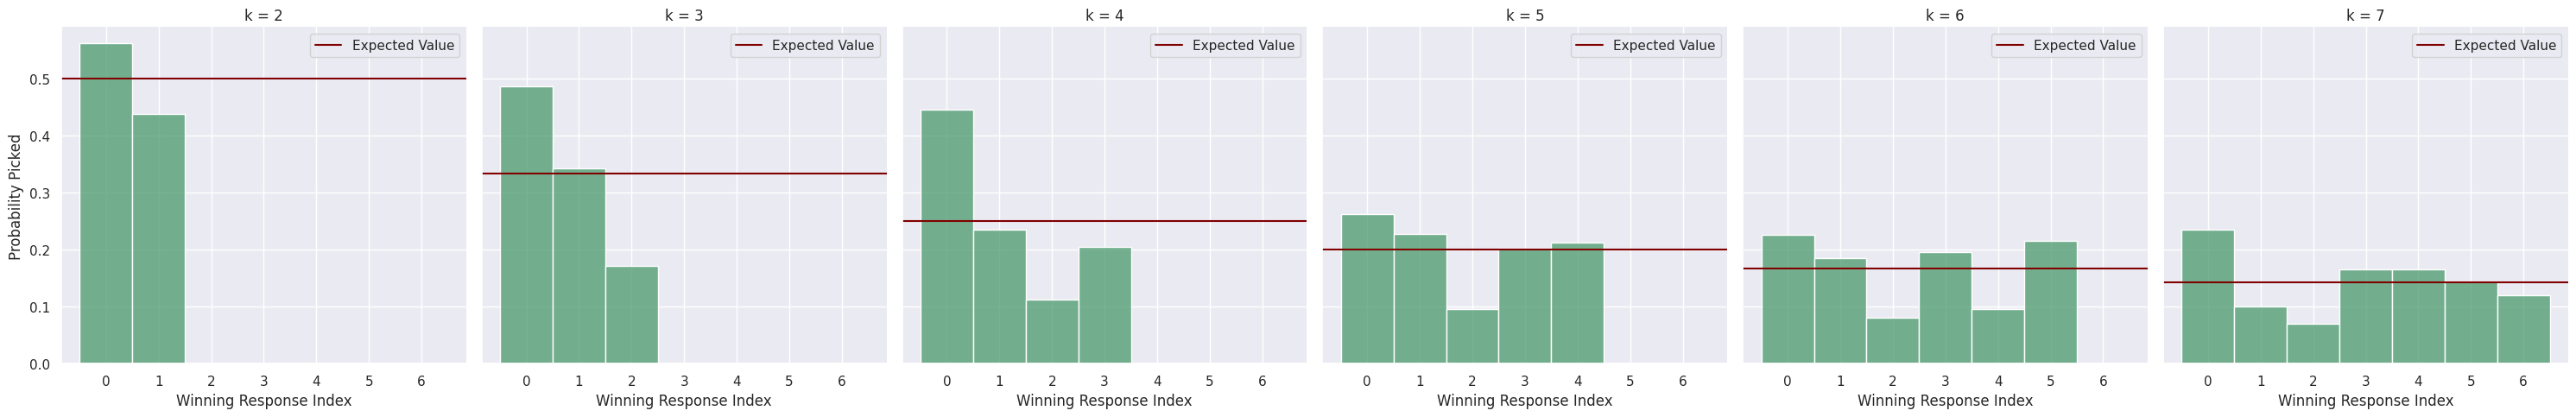

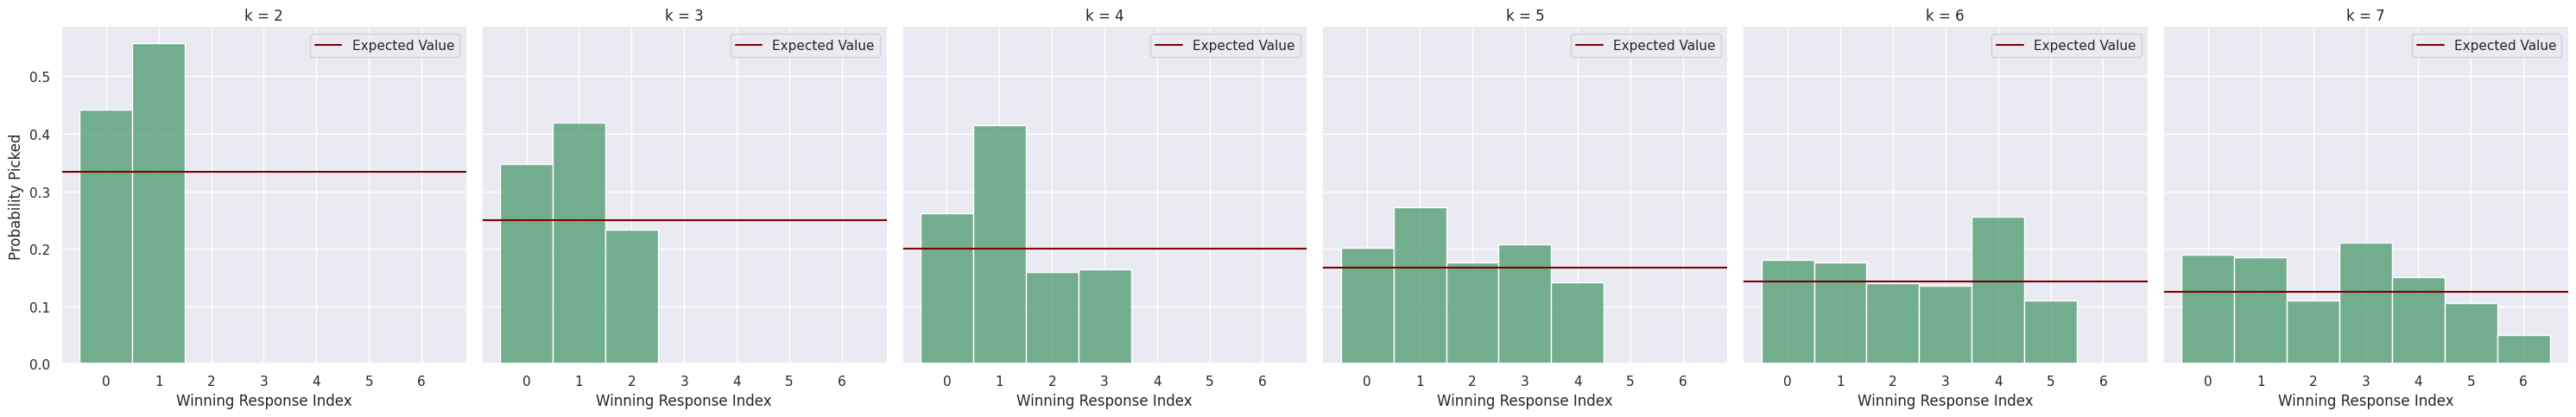

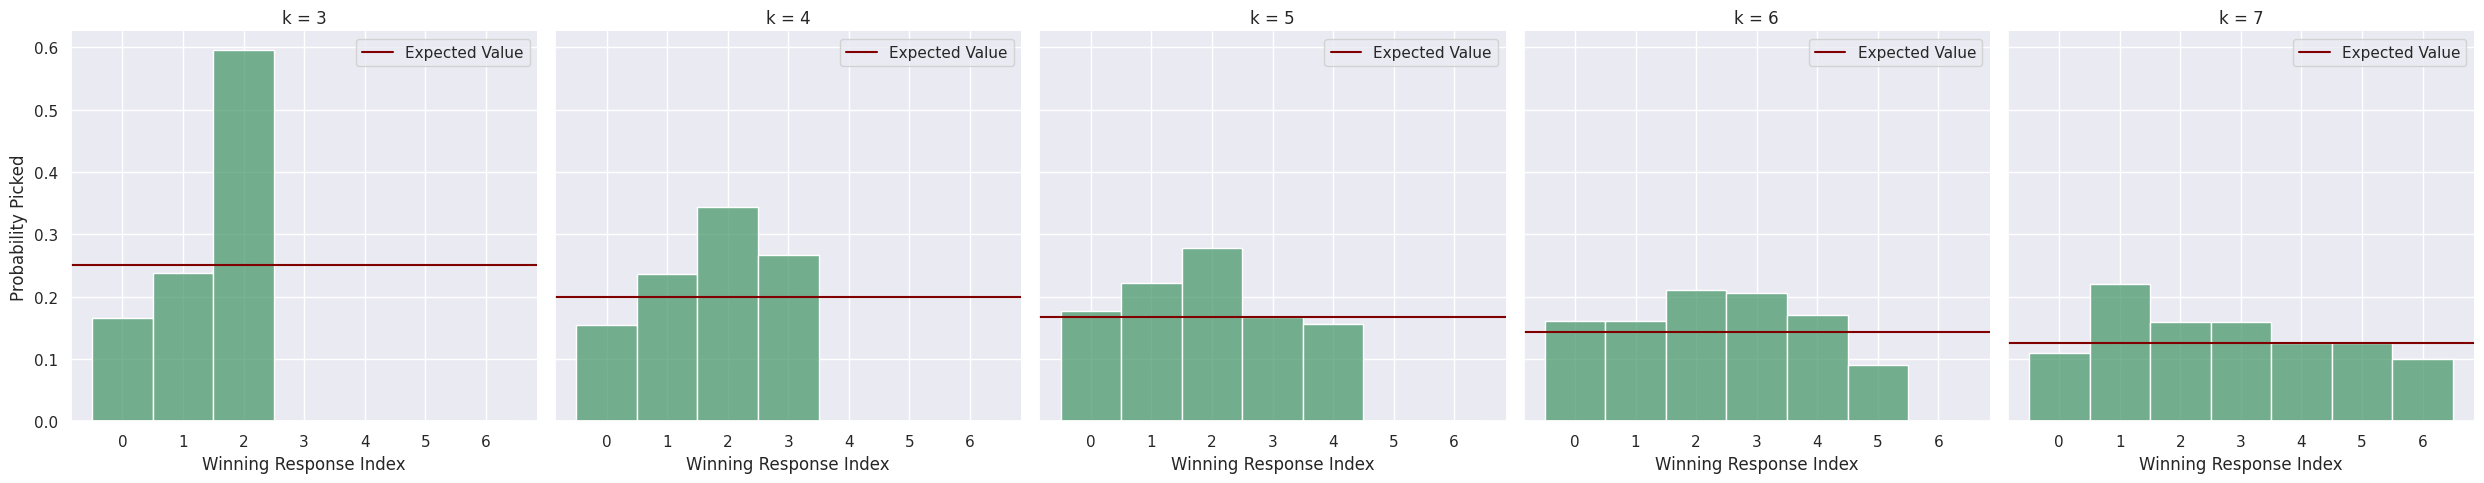

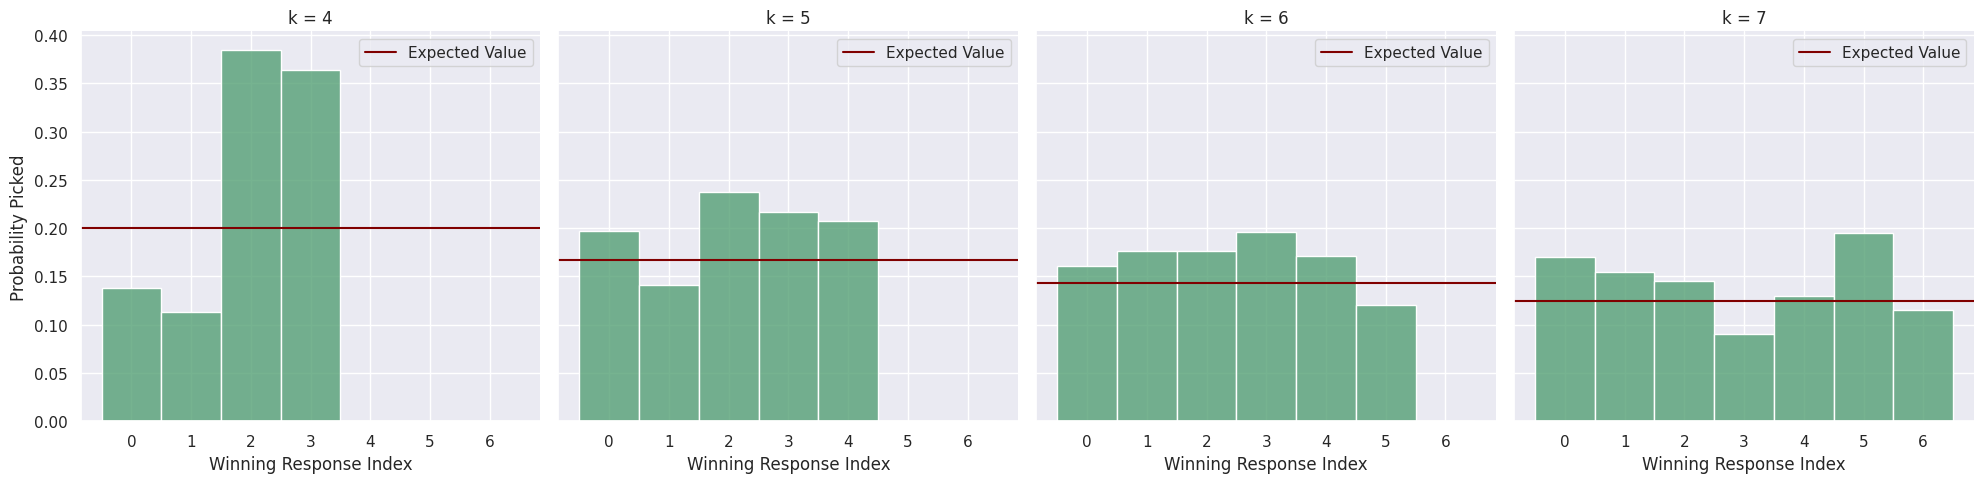

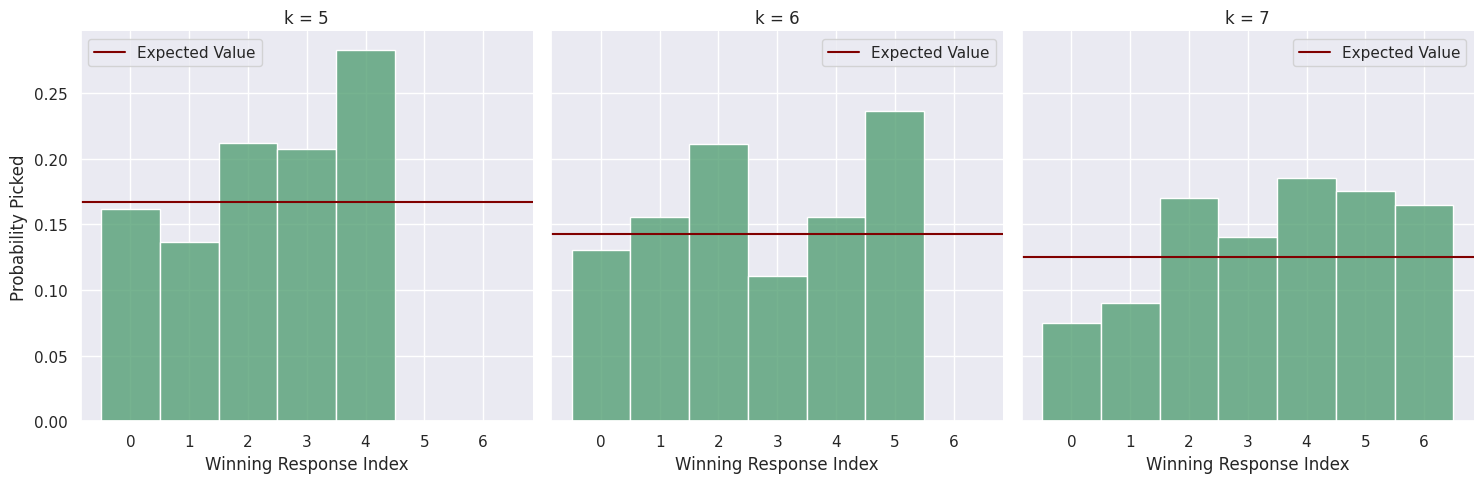

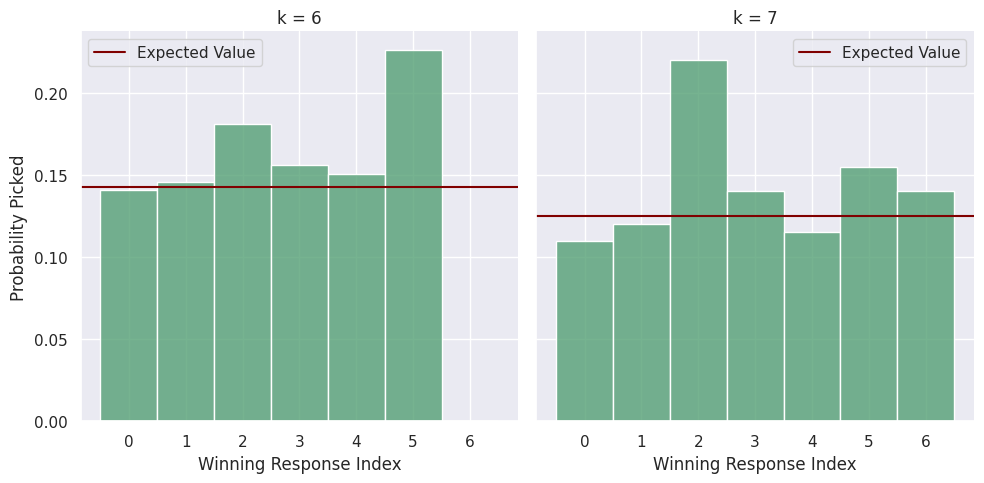

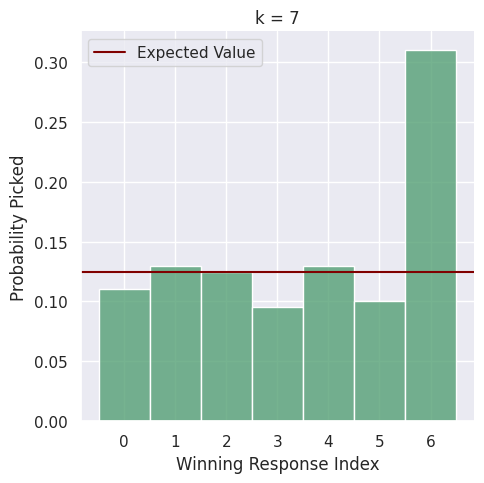

In [3]:
for i in range(0, 7):
    df = data[data.ranking_order.map(len) > i]
    df['winner'] = df.ranking_order.map(lambda x: x[i])
    sns.set_theme(style="whitegrid")
    sns.set(rc={'figure.figsize':(10,5)})
    sns.set(font_scale=1)
    gs = sns.displot(df, x='winner', col='k', kind='hist', discrete=True, stat="probability", common_norm=False, color=sns.light_palette("seagreen")[4], alpha=.8)
    for j, g in enumerate(gs.axes[0]):
        g.axhline(y = 1/ (j + i + 2), linestyle = '-', color='maroon', label="Expected Value")
        g.legend()
        g.set_xlabel('Winning Response Index')
        g.set_ylabel('Probability Picked')

In [4]:
data = pd.read_json("../results/measure_positional_bias_vs_k_no_pairwise/rankings.jsonl", lines=True)
data['temp'] = data.ranking_order.map(lambda r: [dict(position=pos, rank=rank + 1) for rank, pos in enumerate(r)])
data['winner'] = data.ranking_order.map(lambda x: x[0])
data

,prompt,answers,rating_text,ranking_order,model_ranking,k,temp,winner
0,\n\nHuman: Is Alkaline water better for you?\n...,"[{'answer': 'Hm, that’s a hard question. It p...",This is a good natured conversation. The ranki...,"[1, 6, 5, 4, 3, 0, 2]","[mistral-7b-instruct-v0.1, gpt-4-0613, gpt-4, ...",7,"[{'position': 1, 'rank': 1}, {'position': 6, '...",1
1,\n\nHuman: Is Alkaline water better for you?\n...,[{'answer': 'The topic of alkaline water and i...,This is a good natured conversation. The ranki...,"[0, 3, 2, 4, 5, 1]","[gpt-4-0613, mistral-7b-instruct-v0.1, gpt-4, ...",6,"[{'position': 0, 'rank': 1}, {'position': 3, '...",0
2,\n\nHuman: Is Alkaline water better for you?\n...,[{'answer': 'Alkaline water is water that has ...,This is a good natured conversation. The ranki...,"[1, 0, 4, 2, 3]","[mistral-7b-instruct-v0.1, gpt-3.5-turbo, gpt-...",5,"[{'position': 1, 'rank': 1}, {'position': 0, '...",1
3,\n\nHuman: Is Alkaline water better for you?\n...,[{'answer': 'Alkaline water has a higher pH le...,This is a good natured conversation. The ranki...,"[1, 0, 3, 2]","[mistral-7b-instruct-v0.1, gpt-4, gpt-3.5-turb...",4,"[{'position': 1, 'rank': 1}, {'position': 0, '...",1
4,\n\nHuman: Is Alkaline water better for you?\n...,[{'answer': 'There is no scientific evidence t...,This is a good natured conversation. The ranki...,"[1, 2, 0]","[gpt-4, gpt-3.5-turbo, gpt-3.5-turbo-instruct]",3,"[{'position': 1, 'rank': 1}, {'position': 2, '...",1
...,...,...,...,...,...,...,...,...
1183,\n\nHuman: which one is the best burger at McD...,[{'answer': 'The best burger at McDonald's is ...,This is a good natured conversation. The ranki...,"[5, 1, 4, 2, 0, 3]","[gpt-4-0613, gpt-4, oasst-pythia-12b, mistral-...",6,"[{'position': 5, 'rank': 1}, {'position': 1, '...",5
1184,\n\nHuman: which one is the best burger at McD...,[{'answer': 'It depends on your personal prefe...,This is a good natured conversation. The ranki...,"[2, 4, 0, 1, 3]","[gpt-4, mistral-7b-instruct-v0.1, oasst-pythia...",5,"[{'position': 2, 'rank': 1}, {'position': 4, '...",2
1185,\n\nHuman: which one is the best burger at McD...,"[{'answer': 'The ""best"" burger at McDonald's c...",This is a good natured conversation. \n\nThe r...,"[0, 3, 1, 2]","[gpt-4, mistral-7b-instruct-v0.1, oasst-pythia...",4,"[{'position': 0, 'rank': 1}, {'position': 3, '...",0
1186,\n\nHuman: which one is the best burger at McD...,[{'answer': 'The best burger at McDonald's is ...,This is a good natured conversation. The ranki...,"[1, 2, 0]","[oasst-pythia-12b, mistral-7b-instruct-v0.1, g...",3,"[{'position': 1, 'rank': 1}, {'position': 2, '...",1


/tmp/ipykernel_1103251/2480039906.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['winner'] = df.ranking_order.map(lambda x: x[i])
/tmp/ipykernel_1103251/2480039906.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['winner'] = df.ranking_order.map(lambda x: x[i])
/tmp/ipykernel_1103251/2480039906.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

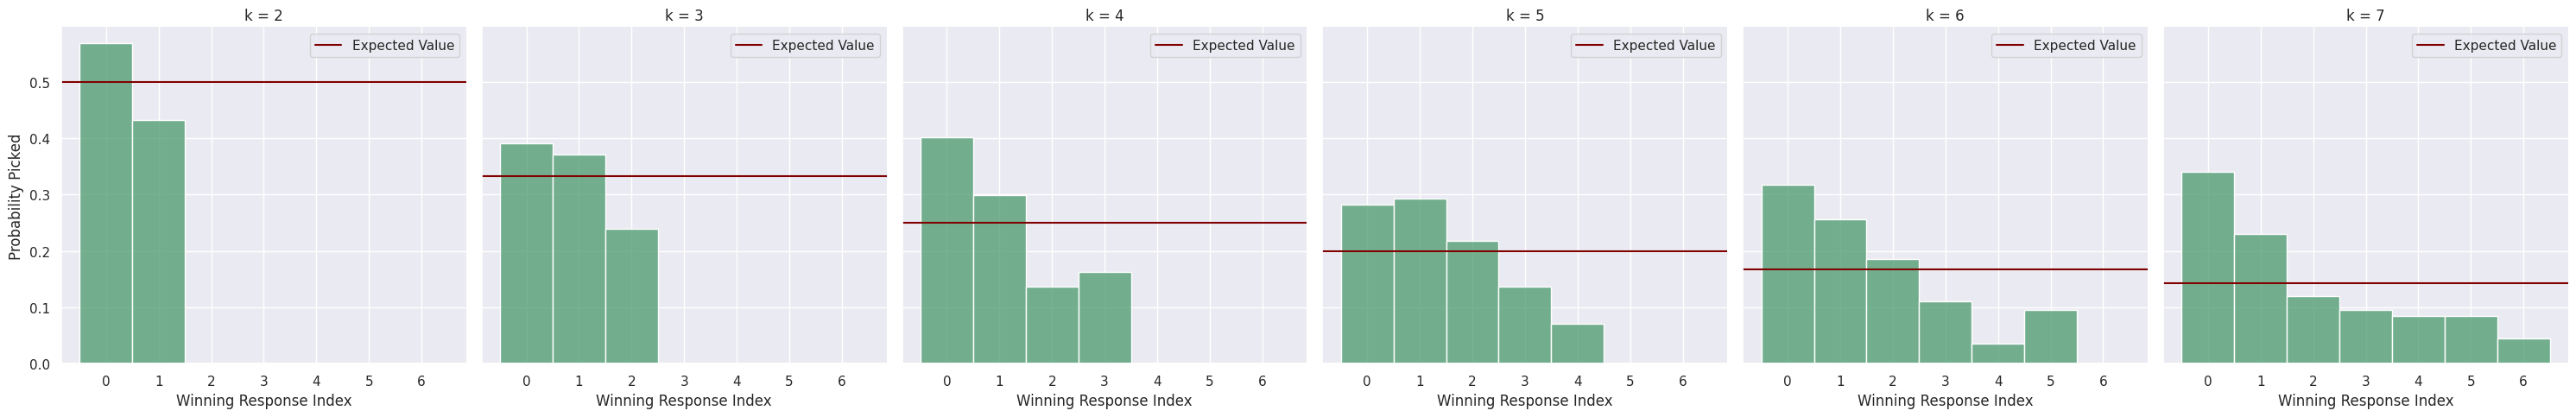

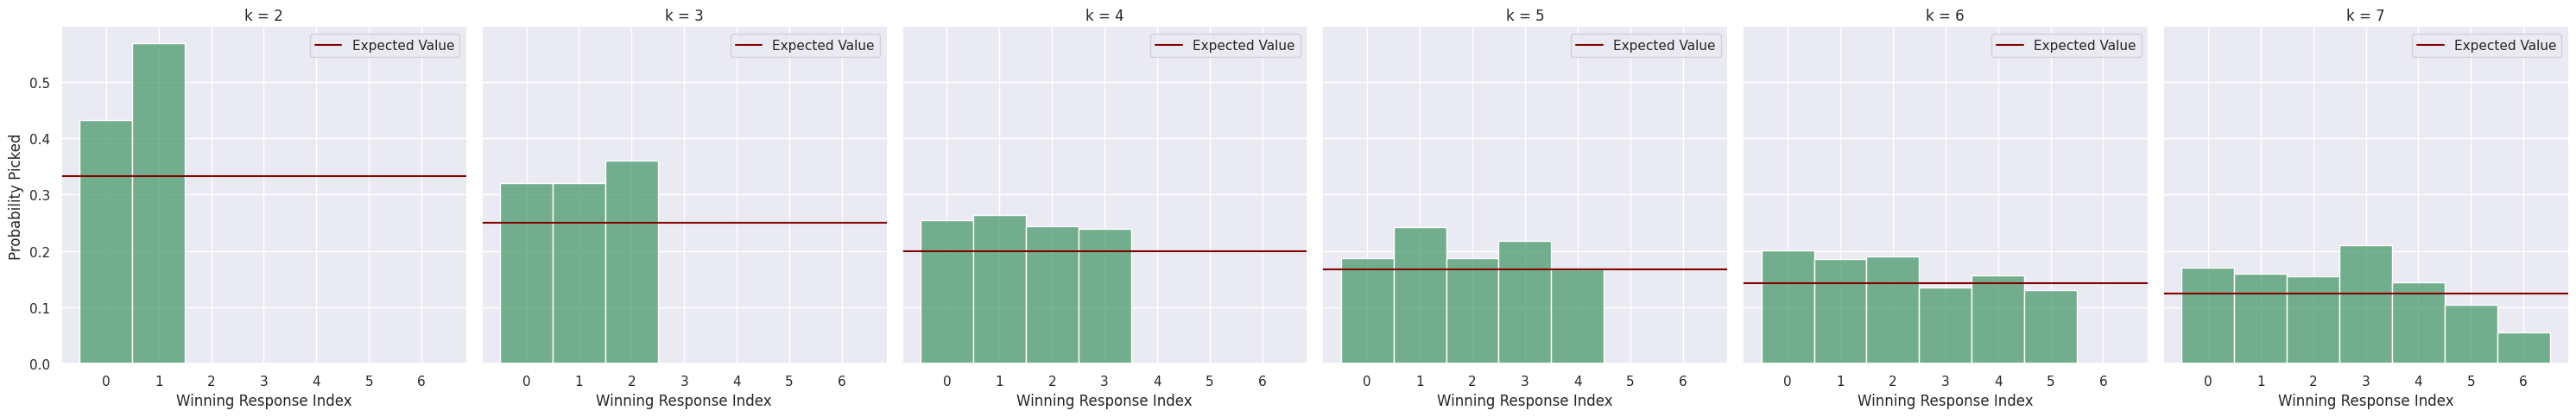

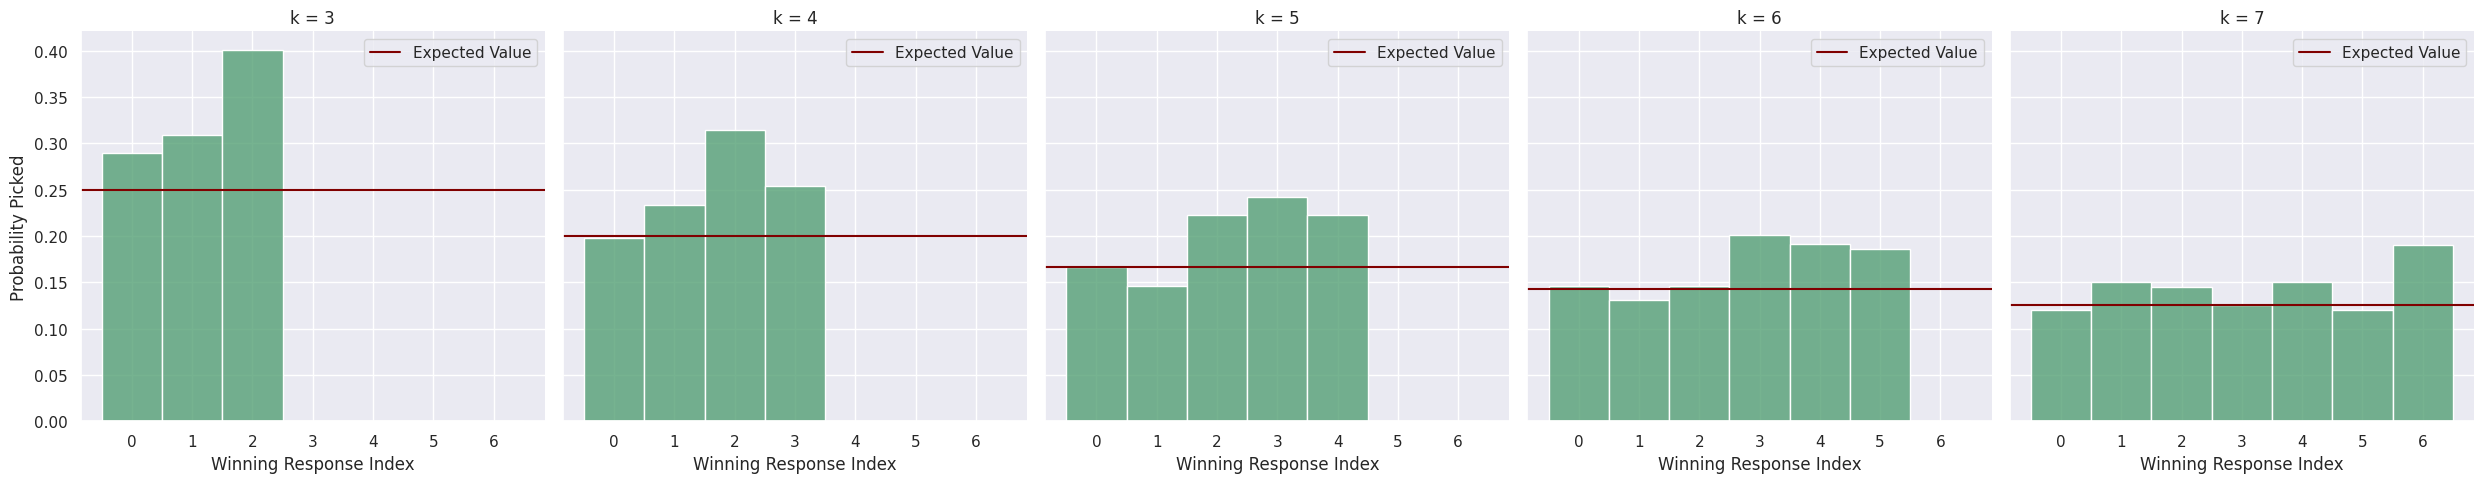

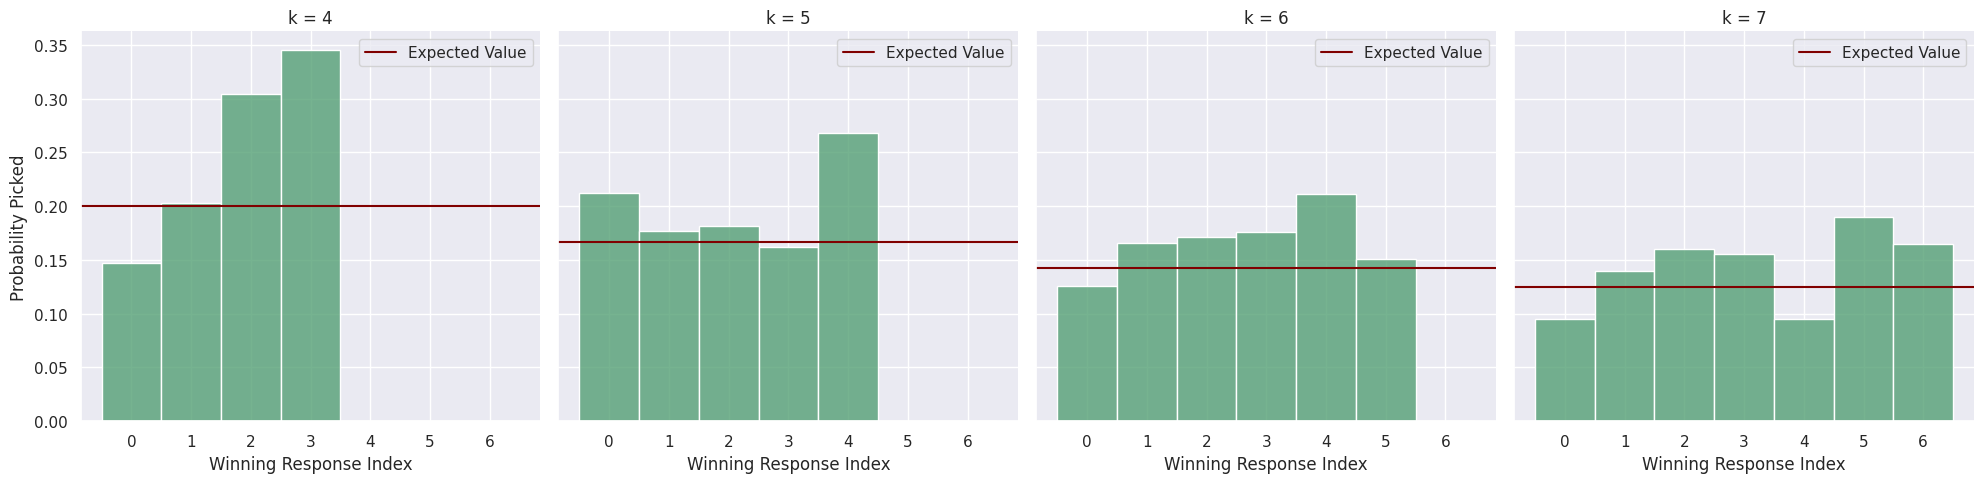

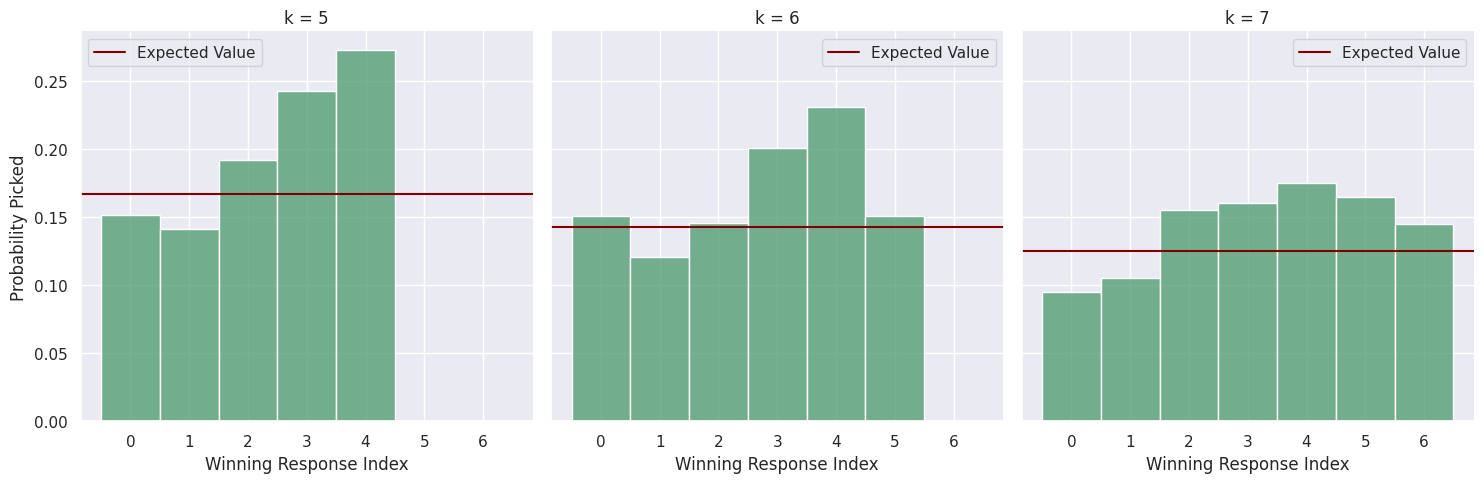

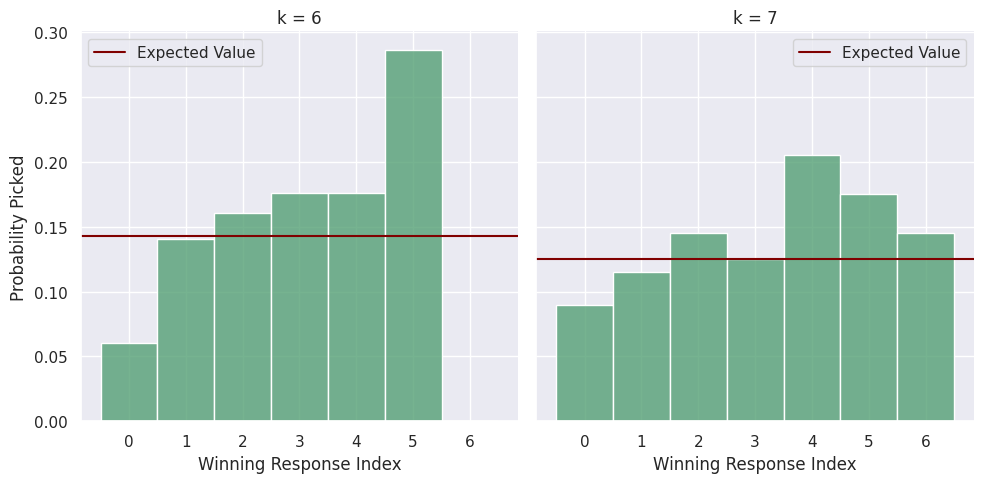

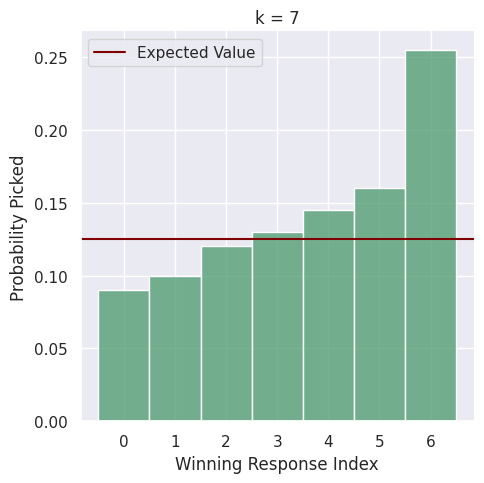

In [5]:
for i in range(0, 7):
    df = data[data.ranking_order.map(len) > i]
    df['winner'] = df.ranking_order.map(lambda x: x[i])
    sns.set_theme(style="whitegrid")
    sns.set(rc={'figure.figsize':(10,5)})
    sns.set(font_scale=1)
    gs = sns.displot(df, x='winner', col='k', kind='hist', discrete=True, stat="probability", common_norm=False, color=sns.light_palette("seagreen")[4], alpha=.8)
    for j, g in enumerate(gs.axes[0]):
        g.axhline(y = 1/ (j + i + 2), linestyle = '-', color='maroon', label="Expected Value")
        g.legend()
        g.set_xlabel('Winning Response Index')
        g.set_ylabel('Probability Picked')